In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\asus\\Downloads\\titanic.csv")
print(data.head())

Matplotlib is building the font cache; this may take a moment.


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [6]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# Only drop columns that actually exist in your file
columns_to_drop = ['Cabin', 'Ticket', 'Name', 'PassengerId']
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data.drop(existing_columns_to_drop, axis=1, inplace=True)

In [13]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,NaN,34.5,0,0,7.8292,NaN
1,1,3,NaN,47.0,1,0,7.0000,NaN
2,0,2,NaN,62.0,0,0,9.6875,NaN
3,0,3,NaN,27.0,0,0,8.6625,NaN
4,1,3,NaN,22.0,1,1,12.2875,NaN
...,...,...,...,...,...,...,...,...
413,0,3,NaN,NaN,0,0,8.0500,NaN
414,1,1,NaN,39.0,0,0,108.9000,NaN
415,0,3,NaN,38.5,0,0,7.2500,NaN
416,0,3,NaN,NaN,0,0,8.0500,NaN


In [12]:
data['Embarked'] = data['Embarked'].map({'S': 0, 'C':1,'Q':2})
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,NaN
1,1,3,1,47.0,1,0,7.0000,NaN
2,0,2,0,62.0,0,0,9.6875,NaN
3,0,3,0,27.0,0,0,8.6625,NaN
4,1,3,1,22.0,1,1,12.2875,NaN
...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,NaN
414,1,1,1,39.0,0,0,108.9000,NaN
415,0,3,0,38.5,0,0,7.2500,NaN
416,0,3,0,NaN,0,0,8.0500,NaN


In [14]:
# Calculate accuracy
accuracy = (data['Survived'] == data['Survived']).mean()
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [16]:
data['Prediction'] = np.where(data['Sex']==1,1,0)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prediction
0,0,3,NaN,34.5,0,0,7.8292,NaN,0
1,1,3,NaN,47.0,1,0,7.0000,NaN,0
2,0,2,NaN,62.0,0,0,9.6875,NaN,0
3,0,3,NaN,27.0,0,0,8.6625,NaN,0
4,1,3,NaN,22.0,1,1,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...
413,0,3,NaN,NaN,0,0,8.0500,NaN,0
414,1,1,NaN,39.0,0,0,108.9000,NaN,0
415,0,3,NaN,38.5,0,0,7.2500,NaN,0
416,0,3,NaN,NaN,0,0,8.0500,NaN,0


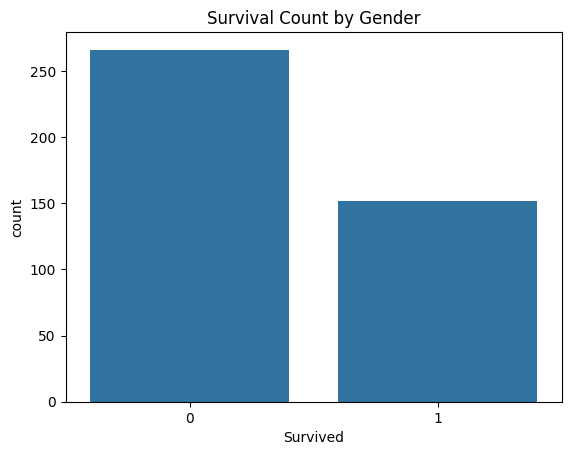

In [21]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count by Gender')
plt.show()


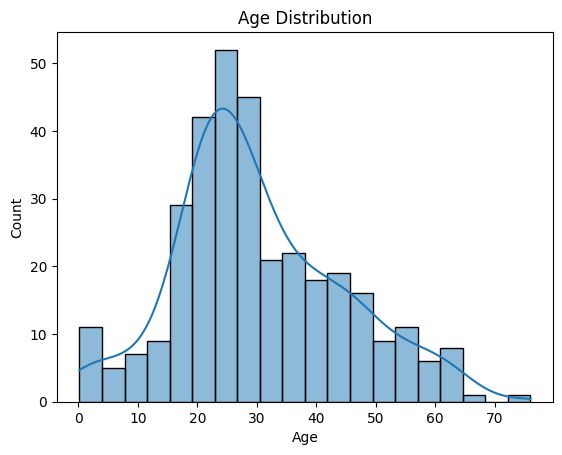

In [20]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


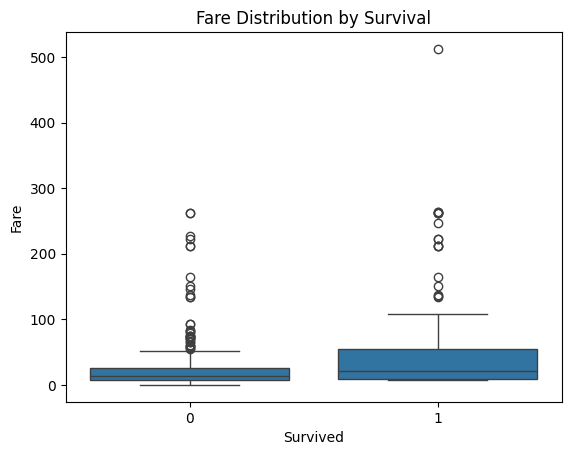

In [22]:
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare Distribution by Survival')
plt.show()